In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("C:\\Users\\singh\\OneDrive\\Desktop\\Courses\\Spring-20 Courses\\Takehome_hotels.csv")

In [33]:
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106


In [34]:
#How many hotels are present in the data provided?
df.HotelID.unique().size

100

In [35]:
#How many distinct stay dates are present for every hotel?
df.groupby('HotelID')['stay_date'].nunique()

HotelID
x10106    90
x105      71
x11082    90
x12056    56
x12144    76
          ..
x8468     90
x8616     82
x8823     60
x8832     79
x9998     66
Name: stay_date, Length: 100, dtype: int64

In [36]:
#Calculate the average & median ’num_days’ for every HotelID (HotelID--> (avg num_days,
median num_days)).Round off the mean,median values to an integer
mean_num_days = df.groupby('HotelID').num_days.mean().astype(int)
mean_num_days = mean_num_days.rename('mean_num_days')
median_num_days = df.groupby('HotelID').num_days.median().astype(int)
median_num_days = median_num_days.rename('median_num_days')
print(mean_num_days)
#print(median_num_days)

HotelID
x10106    130
x105      152
x11082    121
x12056    238
x12144    152
         ... 
x8468     138
x8616     164
x8823     178
x8832     152
x9998     164
Name: mean_num_days, Length: 100, dtype: int32


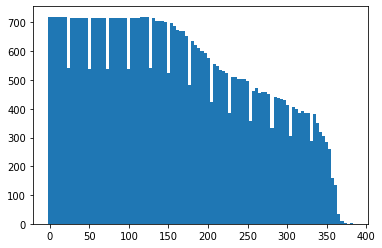

In [37]:
Plot the histogram of num_days of hotels 'x11082' and 'x36'
#histogram
h = list(df.num_days[df.HotelID=='x11082'])+list(df.num_days[df.HotelID=='x36'])
plt.hist(h,bins=100)
plt.show()

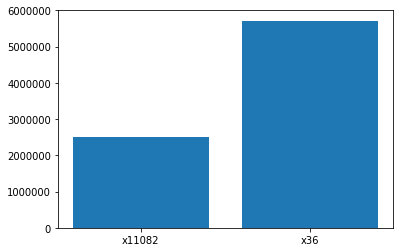

In [38]:
#Bar plot
hotels = ['x11082','x36']
sum1 = sum(list(df.num_days[df.HotelID=='x11082']))
sum2 = sum(list(df.num_days[df.HotelID=='x36']))

plt.bar(hotels,[sum1,sum2])
plt.show()

In [39]:
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106


In [40]:
df_num_days = mean_num_days.to_frame().join(median_num_days.to_frame())
df_num_days.reset_index(inplace = True)
df_num_days['Skewness'] = np.nan
df_num_days.head()

,HotelID,mean_num_days,median_num_days,Skewness
0,x10106,130,126,NaN
1,x105,152,151,NaN
2,x11082,121,114,NaN
3,x12056,238,237,NaN
4,x12144,152,151,NaN


In [41]:
for i in range(len(df_num_days)):
    if df_num_days['mean_num_days'][i] < df_num_days['median_num_days'][i]:
        df_num_days['Skewness'][i] = 'Left-tailed'
    elif df_num_days['mean_num_days'][i] > df_num_days['median_num_days'][i]:
        df_num_days['Skewness'][i] = 'Right-tailed'
    else:
        df_num_days['Skewness'][i] = 'No skew'

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df_num_days.head()

,HotelID,mean_num_days,median_num_days,Skewness
0,x10106,130,126,Right-tailed
1,x105,152,151,Right-tailed
2,x11082,121,114,Right-tailed
3,x12056,238,237,Right-tailed
4,x12144,152,151,Right-tailed


In [43]:
#Create a column called "Skewness" with three categories ("Right-tailed", "Left-tailed" and "No skew") based on mean, median of "num_days" created in Step 3. How many hotels' num_days are "Right-tailed", "Left-tailed" and "No skew" ?
df['Skewness'] = df['HotelID'].map(df_num_days.set_index('HotelID')['Skewness'])
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID,Skewness
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106,Right-tailed
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106,Right-tailed
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106,Right-tailed
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106,Right-tailed
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106,Right-tailed


In [44]:
frame_num_days = mean_num_days.to_frame()
frame_num_days.reset_index(inplace=True)
frame_num_days['median_num_days'] = median_num_days

In [45]:
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID,Skewness
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106,Right-tailed
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106,Right-tailed
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106,Right-tailed
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106,Right-tailed
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106,Right-tailed


In [46]:
df['Skewness'].value_counts()

Right-tailed    2232975
No skew          165209
Left-tailed       23410
Name: Skewness, dtype: int64

In [47]:
avg_r2 = df.groupby('HotelID')['r2'].mean()
avg_r2 = avg_r2.to_frame()
avg_r2.reset_index(inplace = True)
avg_r2.head()

,HotelID,r2
0,x10106,68.012681
1,x105,18.623093
2,x11082,54.506991
3,x12056,31.910979
4,x12144,70.522702


In [48]:
df['avg_r2'] = df['HotelID'].map(avg_r2.set_index('HotelID')['r2'])
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID,Skewness,avg_r2
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106,Right-tailed,68.012681
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106,Right-tailed,68.012681
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106,Right-tailed,68.012681
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106,Right-tailed,68.012681
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106,Right-tailed,68.012681


In [49]:
new_df = df[(df['as_of_date'] == '2020-06-01') & (df['stay_date'] >= '2020-06-01') & (df['stay_date'] <= '2020-06-30')]
new_df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID,Skewness,avg_r2
7694,2020-06-01,0,11,11,0,2105.0,2105.0,0.0,2020-06-01,x10106,Right-tailed,68.012681
7843,2020-06-02,1,9,5,-4,1455.0,775.0,-680.0,2020-06-01,x10106,Right-tailed,68.012681
7997,2020-06-03,2,9,7,-2,1195.0,1145.0,-50.0,2020-06-01,x10106,Right-tailed,68.012681
8152,2020-06-04,3,25,22,-3,4414.0,4356.0,-58.0,2020-06-01,x10106,Right-tailed,68.012681
8360,2020-06-05,4,26,16,-10,4196.0,2590.0,-1606.0,2020-06-01,x10106,Right-tailed,68.012681


In [57]:
#With as_of_date "2020-06-01", select the top 10 hotels with the highest average r2 in June 2020
df1 = new_df.groupby(['as_of_date','HotelID'])['avg_r2'].unique()
df1 = df1.to_frame()
df1.reset_index(inplace = True)
df1 = df1.sort_values(by=['avg_r2'],ascending = False)[:10]
top_hotel = list(df1['HotelID'])
print(top_hotel)
print(df1['HotelID'])

['x38', 'x46', 'x37', 'x36', 'x14690', 'x14287', 'x2788', 'x65807', 'x1617', 'x65754']
39       x38
45       x46
38       x37
35       x36
9     x14690
7     x14287
29     x2788
82    x65807
14     x1617
78    x65754
Name: HotelID, dtype: object


In [55]:
new_df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID,Skewness,avg_r2
7694,2020-06-01,0,11,11,0,2105.0,2105.0,0.0,2020-06-01,x10106,Right-tailed,68.012681
7843,2020-06-02,1,9,5,-4,1455.0,775.0,-680.0,2020-06-01,x10106,Right-tailed,68.012681
7997,2020-06-03,2,9,7,-2,1195.0,1145.0,-50.0,2020-06-01,x10106,Right-tailed,68.012681
8152,2020-06-04,3,25,22,-3,4414.0,4356.0,-58.0,2020-06-01,x10106,Right-tailed,68.012681
8360,2020-06-05,4,26,16,-10,4196.0,2590.0,-1606.0,2020-06-01,x10106,Right-tailed,68.012681


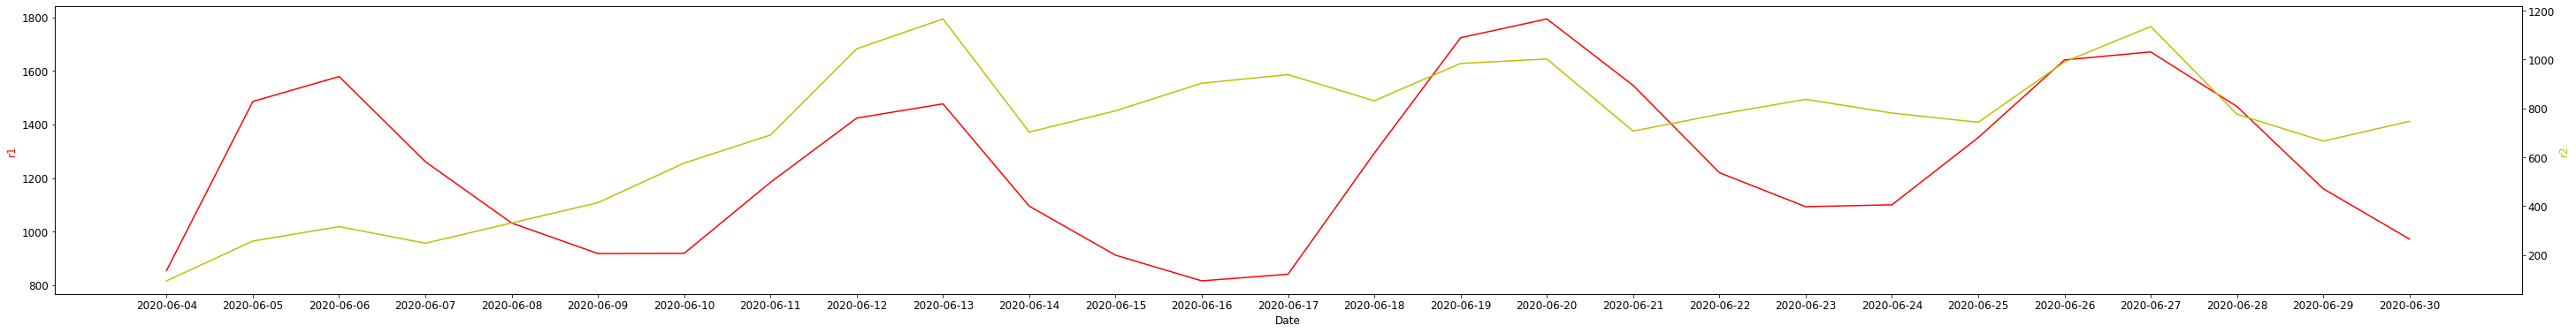

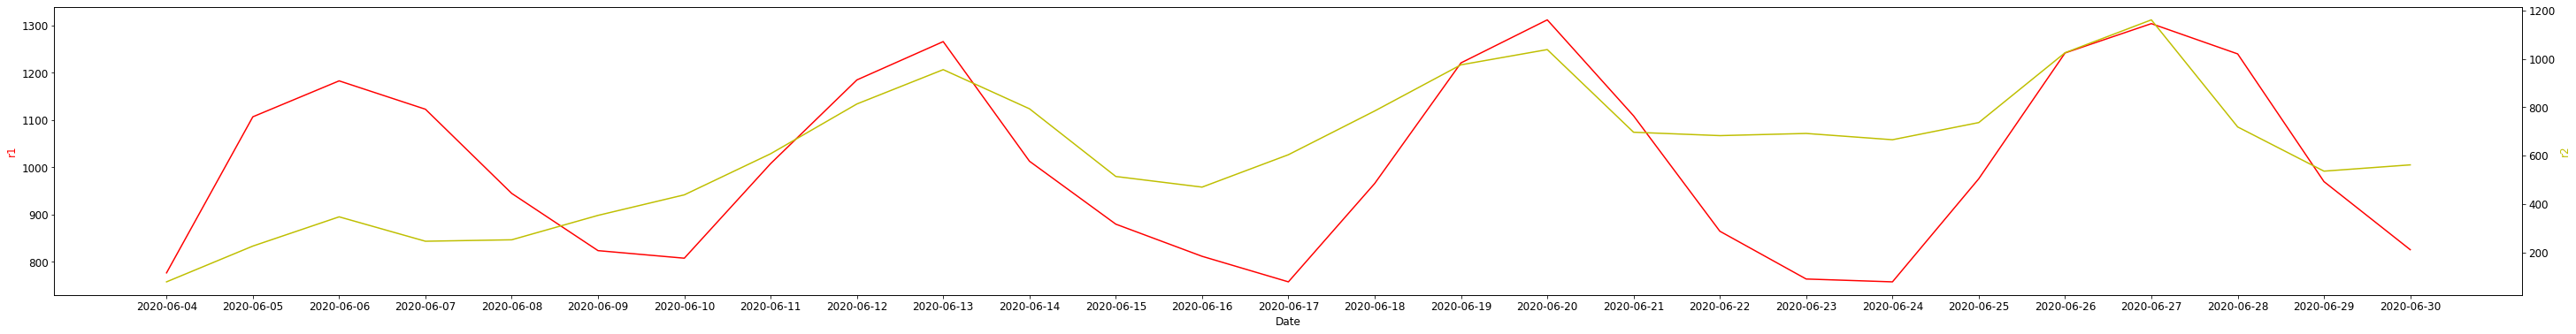

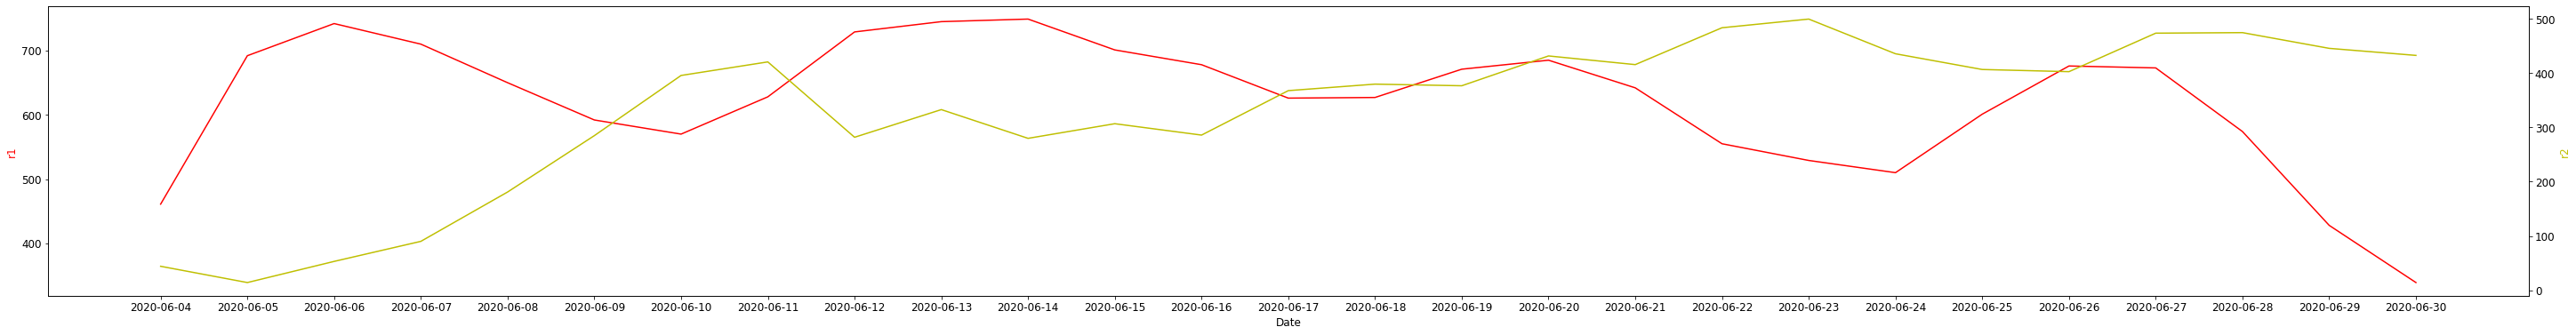

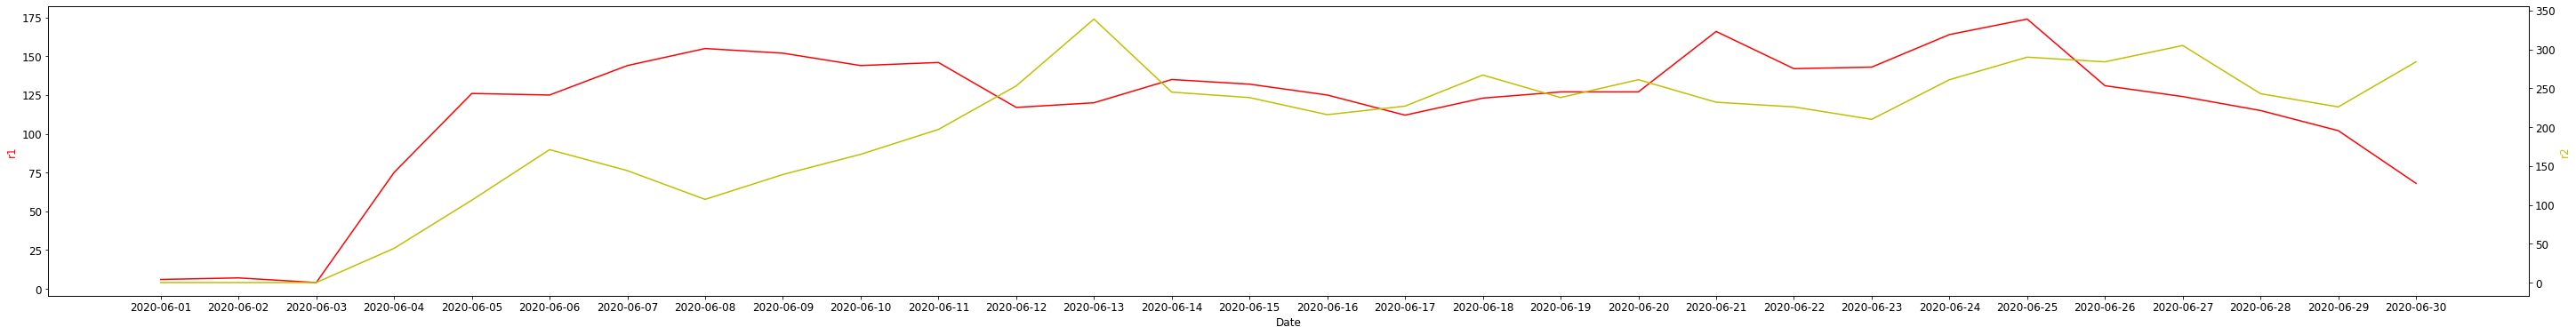

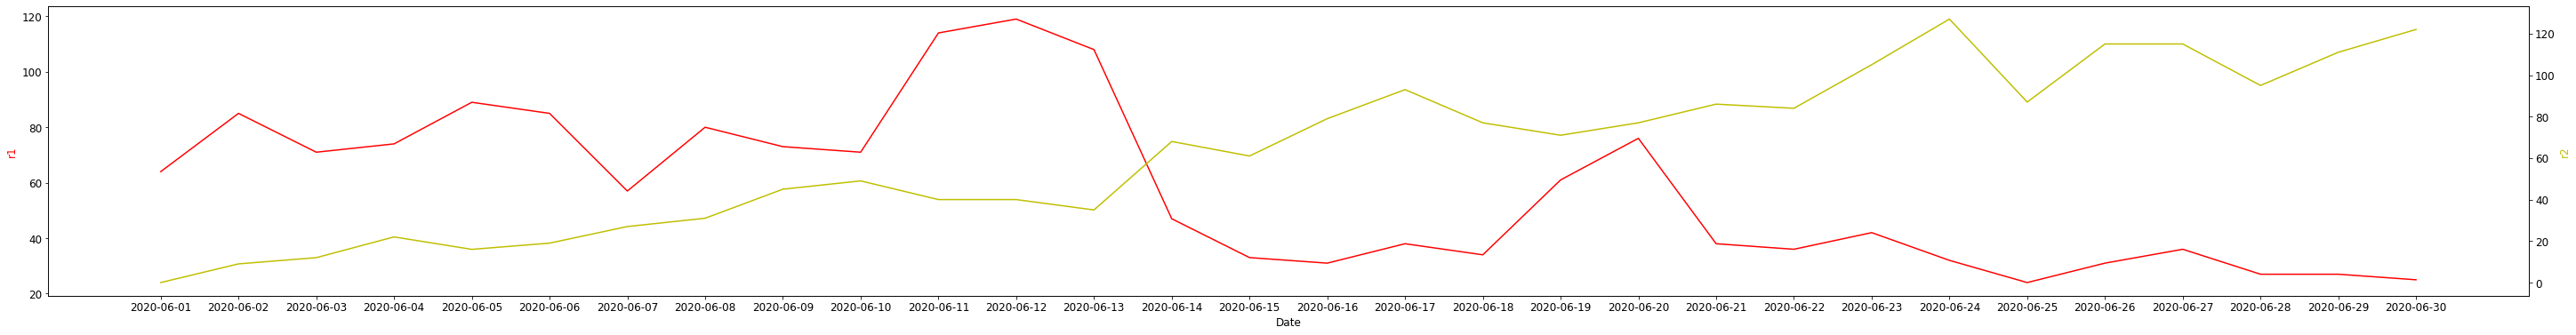

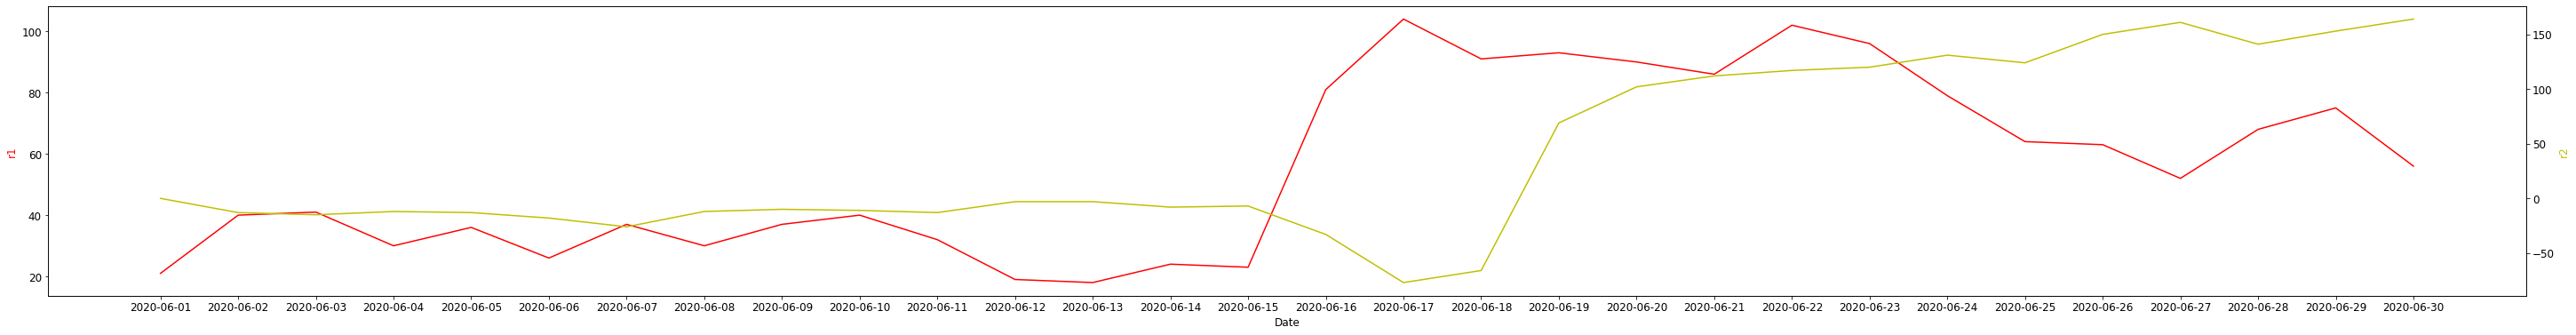

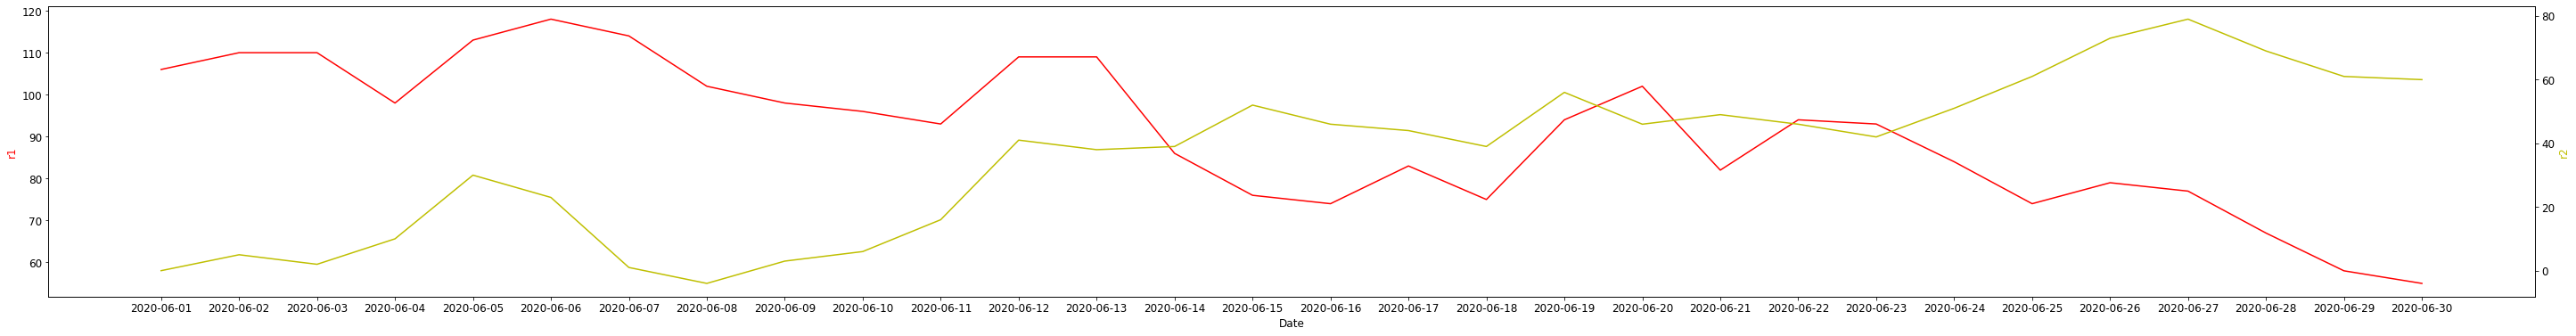

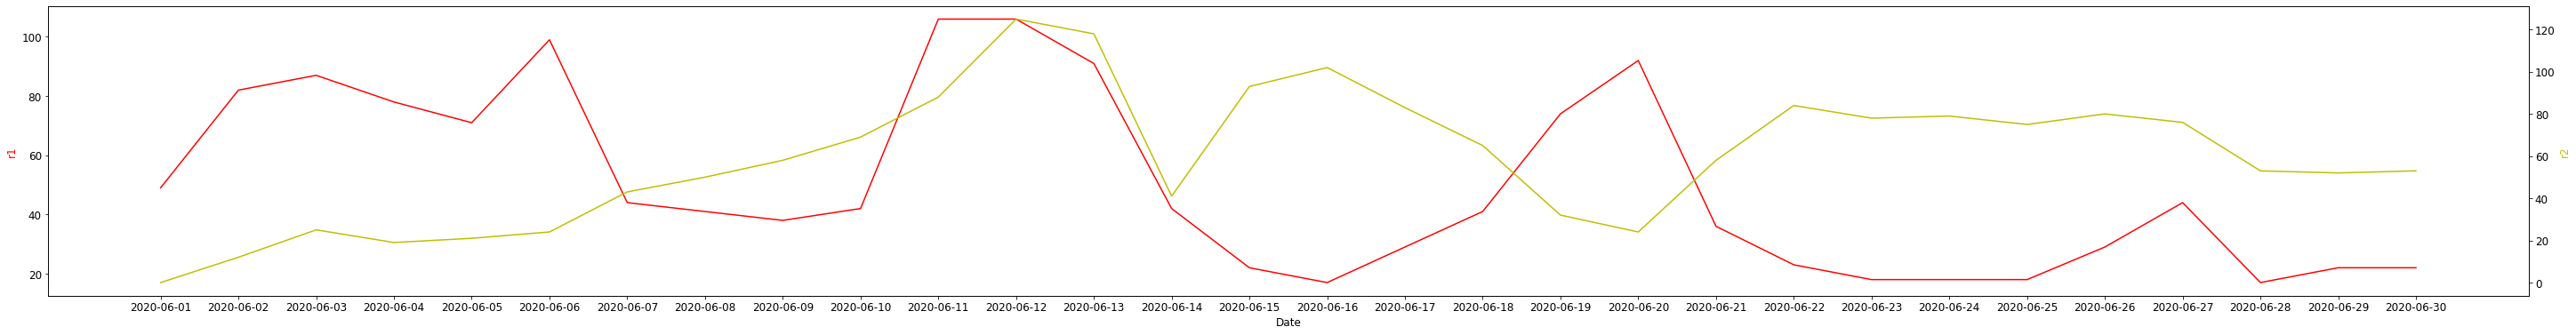

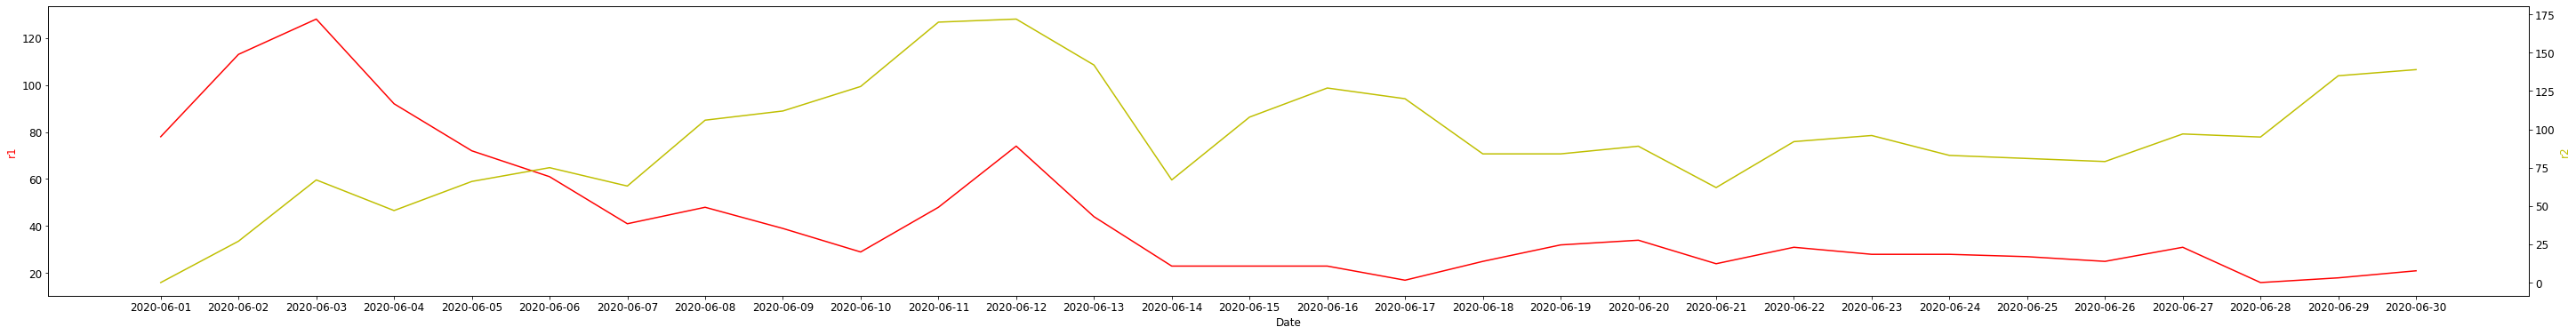

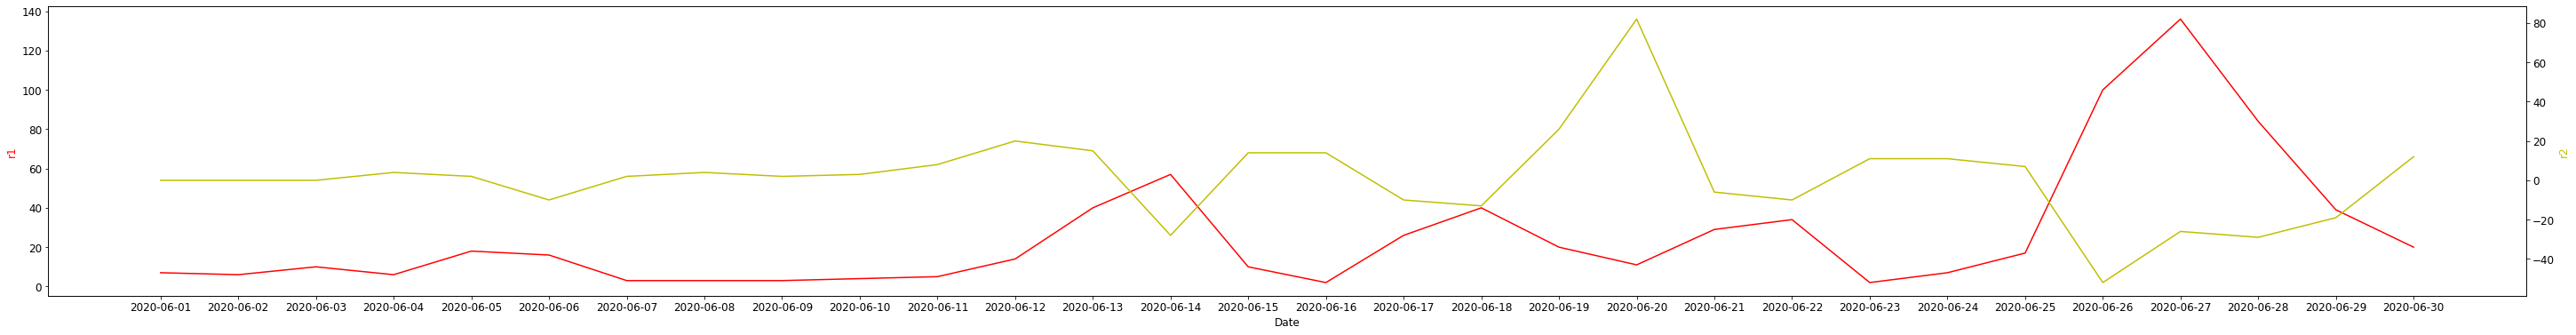

In [112]:
#With as_of_date "2020-06-01", for the top 10 hotels from above, plot time series graphs of r1 and r2 in June 2020 (total of 10 graphs)
from datetime import datetime
for hotel in top_hotel:
    plt.rc('font', size=12)
    fig, ax1 = plt.subplots(figsize=(50, 6))
    ax2 = ax1.twinx()
    ax1.plot(new_df[new_df['HotelID']==hotel]['stay_date'],new_df[new_df['HotelID']==hotel]['r1'],label=hotel,color = 'r')
    ax2.plot(new_df[new_df['HotelID']==hotel]['stay_date'],new_df[new_df['HotelID']==hotel]['r2'],label=hotel,color = 'y')
    ax.legend(loc='upper left')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('r1',color = 'r')
    ax2.set_ylabel('r2',color = 'y')
